<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Jobsheet_4/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1

In [8]:
# Persiapan data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Tampilkan data seleksi
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


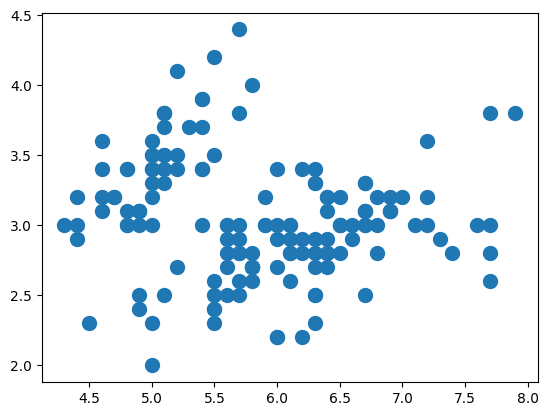

In [11]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [13]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

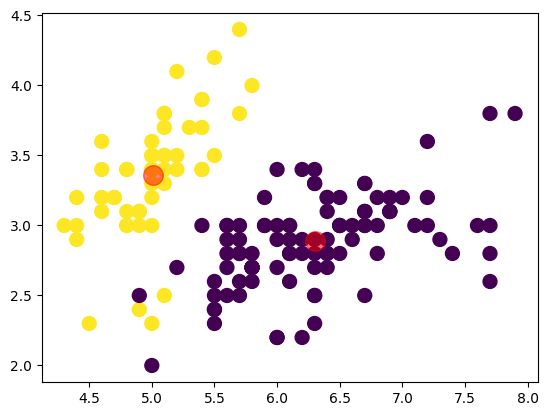

In [14]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [17]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


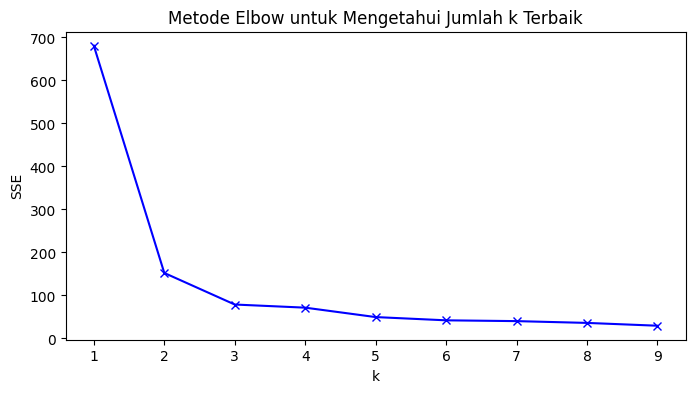

In [19]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [20]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=71.65709026750072
k=5; SSE=49.74856700802584
k=6; SSE=42.19929596273295
k=7; SSE=40.34806758241756
k=8; SSE=36.17838001756693
k=9; SSE=29.647330659536536


# Praktikum 2

In [21]:
# Import library

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

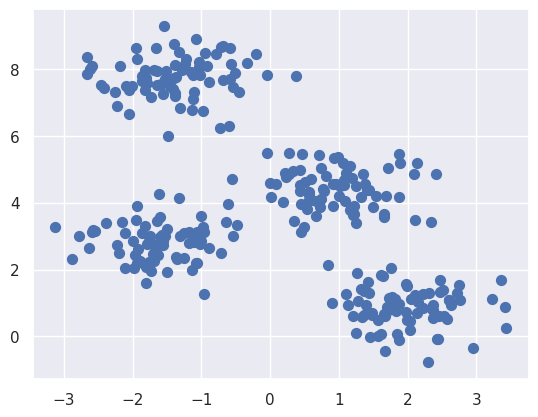

In [23]:
# Pengantar k-Means

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

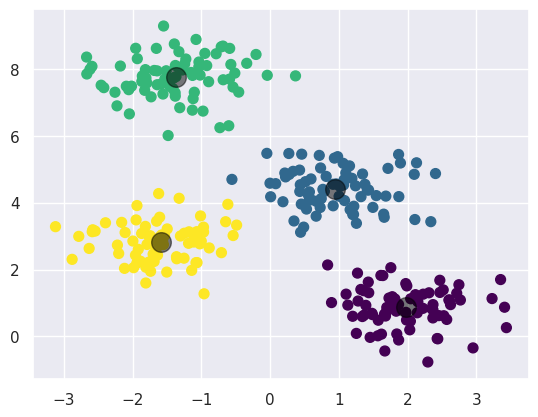

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

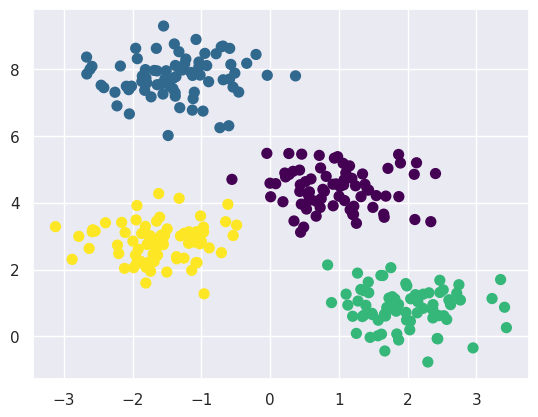

In [26]:
# Algoritma Expectation-Maximization

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

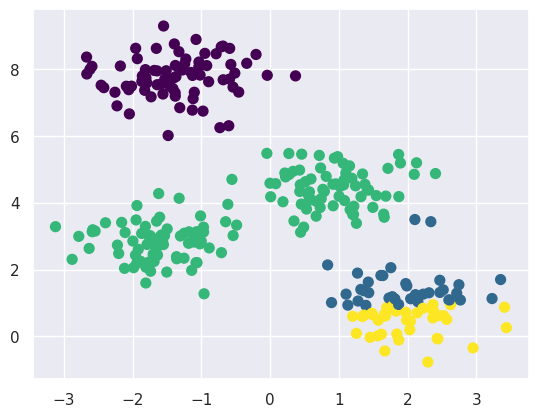

In [27]:
# Perubahan random

centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

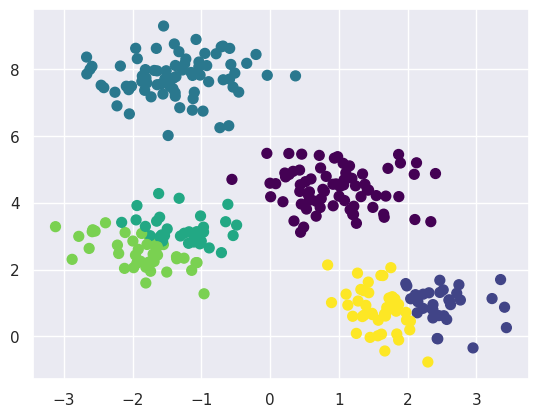

In [28]:
#Optimalisasi Jumlah Klaster

labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

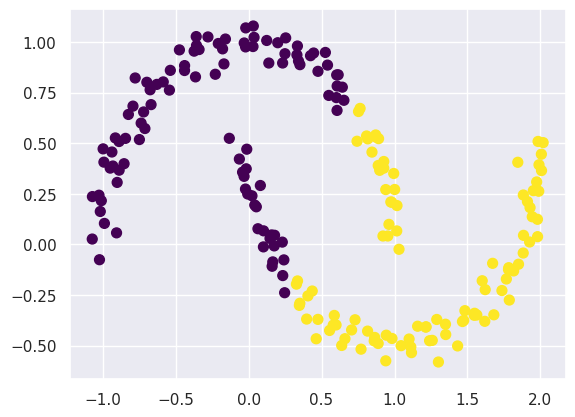

In [33]:
# Batas Klaster yang Tidak Selalu Linier

from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


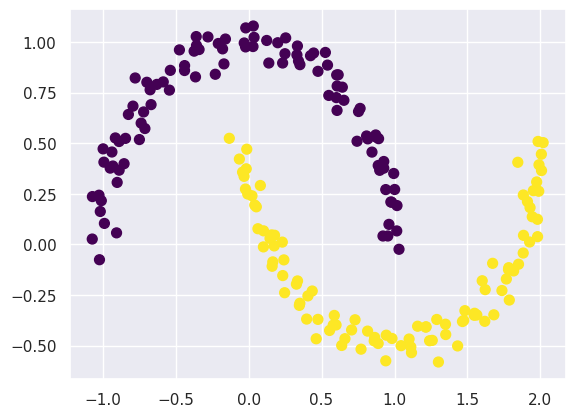

In [34]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Contoh Kasus 1: Karakter Angka

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [36]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

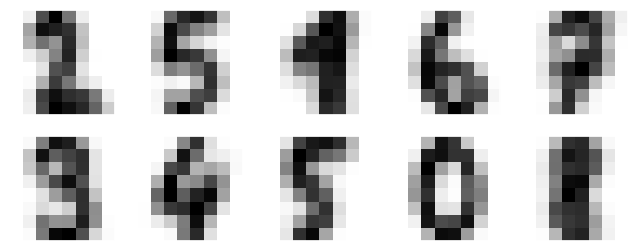

In [37]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [38]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

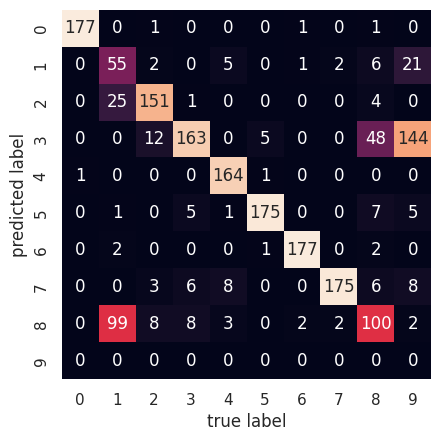

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [42]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

Studi Kasus 2: Kompresi Citra


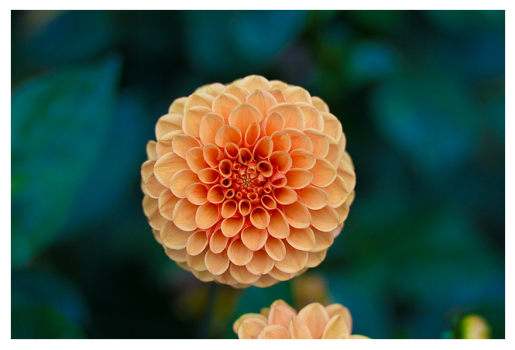

In [43]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [44]:
flower.shape

(427, 640, 3)

In [45]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [46]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

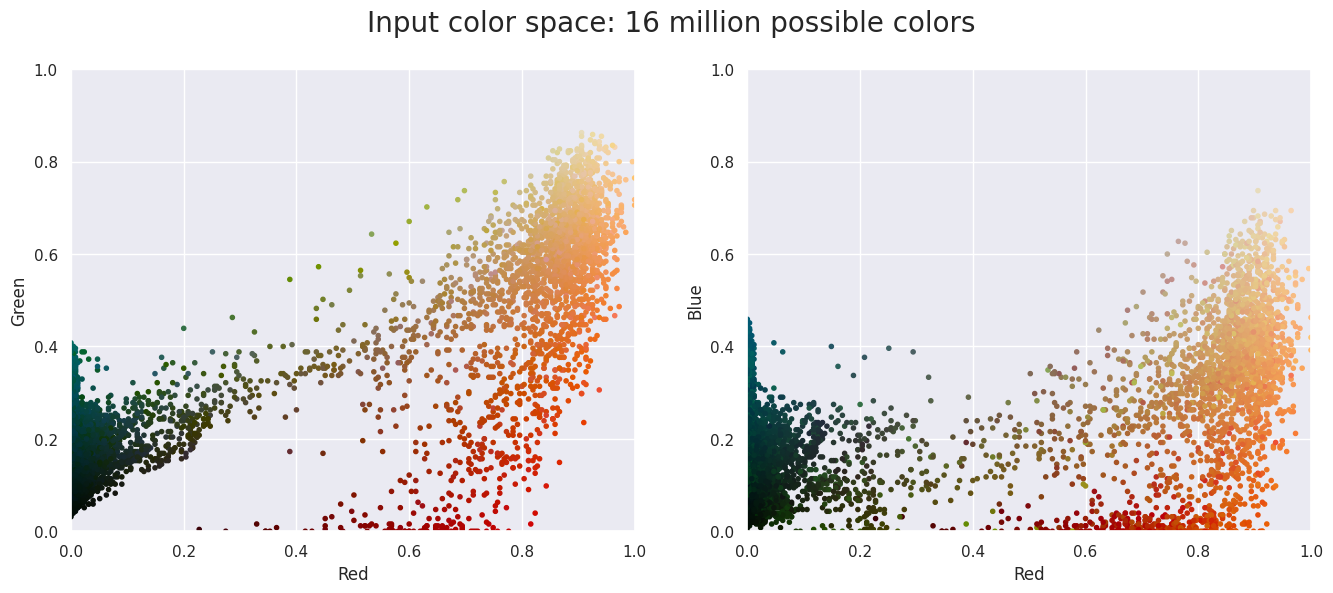

In [47]:
plot_pixels(data, title='Input color space: 16 million possible colors')

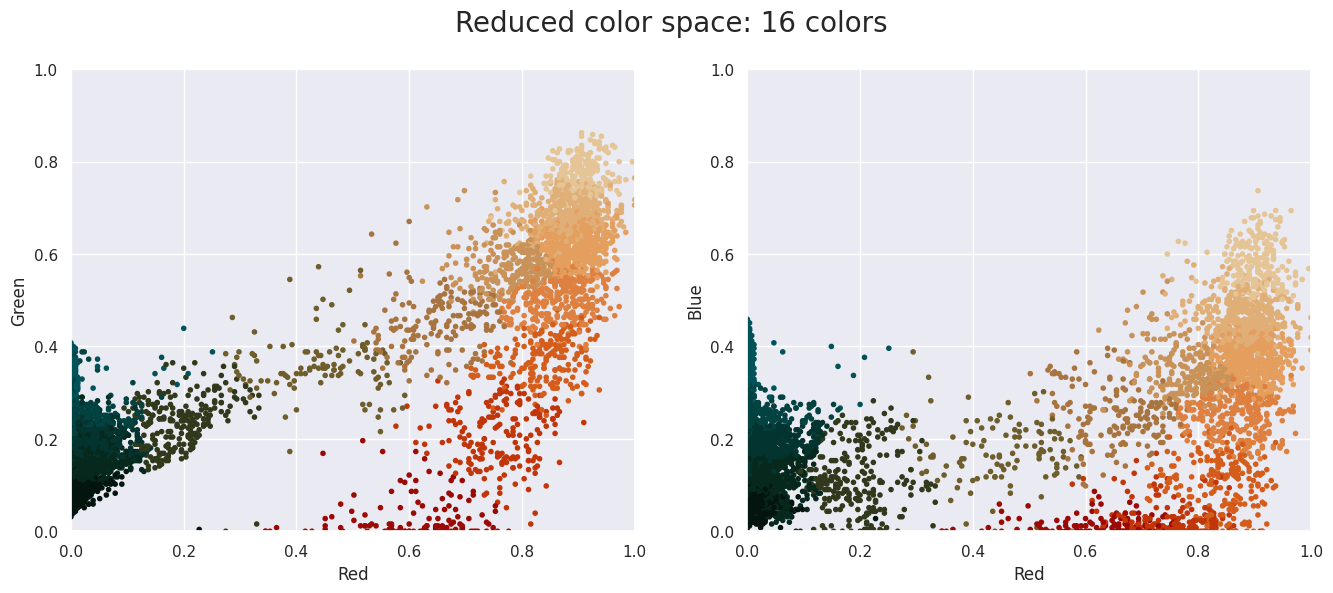

In [48]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

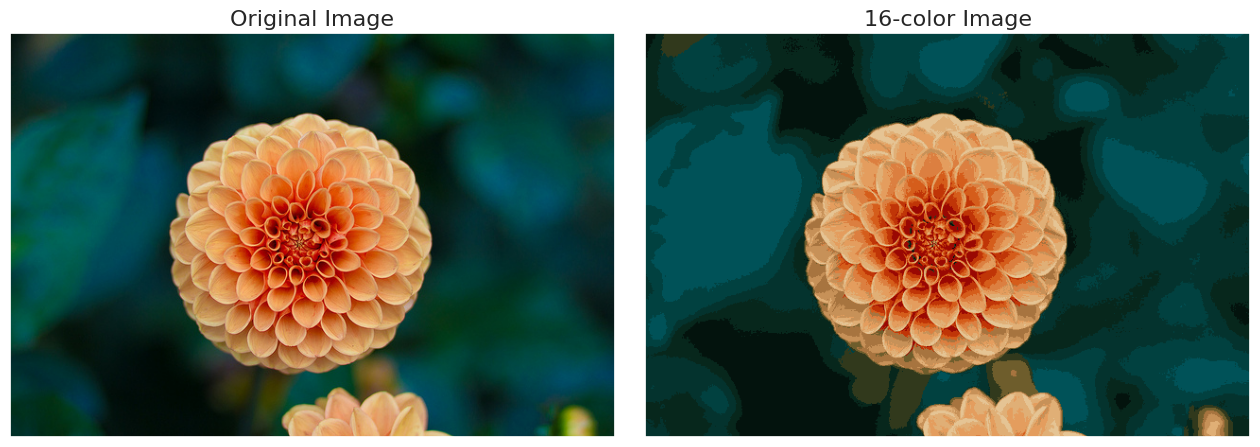

In [49]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# PRAKTIKUM 3

Pembuatan Dataset Sintetis

Untuk mempelajari DBSCAN, kita akan membuat dataset sederhana berupa 3 klaster buatan menggunakan fungsi  make_blobs  dari Scikit-Learn.

In [51]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

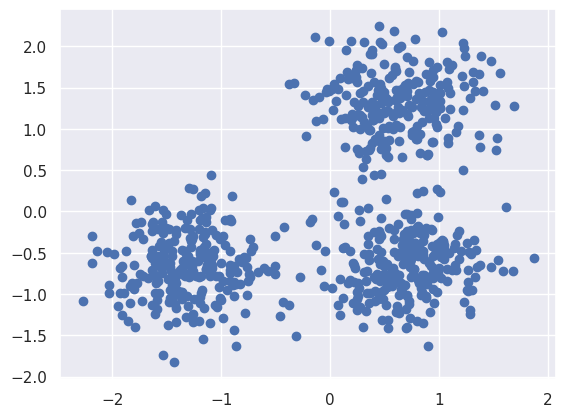

In [54]:
# Visualisasikan data yang dihasilkan dengan cara ini:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

Compute DBSCAN

Sekarang kita terapkan DBSCAN pada data tersebut.

Label yang ditetapkan oleh DBSCAN dapat diakses melalui atribut labels_. Titik data yang dianggap noise akan diberi label khusus.

In [56]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


* eps=0.3 → jarak maksimum antar titik untuk dianggap tetangga.

* min_samples=10 → jumlah minimum titik dalam radius eps agar dianggap area padat (core sample).

* Label hasil klasterisasi tersedia di labels. Nilai -1 berarti titik tersebut dianggap noise atau outlier.

Evaluasi Kualitas Klasterisasi

Karena kita menggunakan dataset sintetis (make_blobs), kita tahu label aslinya (labels_true). Ini memungkinkan kita mengukur kualitas DBSCAN dengan berbagai metrik evaluasi.

In [58]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


* Homogeneity → apakah tiap klaster hanya berisi satu label asli.

* Completeness → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.

* V-measure → rata-rata harmonik dari homogeneity dan completeness.

* Adjusted Rand Index (ARI) → kesesuaian antara klasterisasi dengan label asli.

* Adjusted Mutual Information (AMI) → kesamaan informasi antara klasterisasi dengan label asli.

* Silhouette Coefficient → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster).

Visualisasi Hasil Klasterisasi

Kita akan memvisualisasikan hasil DBSCAN.

* Core sample ditampilkan dengan titik besar.

* Non-core sample ditampilkan dengan titik kecil.

* Noise ditampilkan dengan warna hitam.

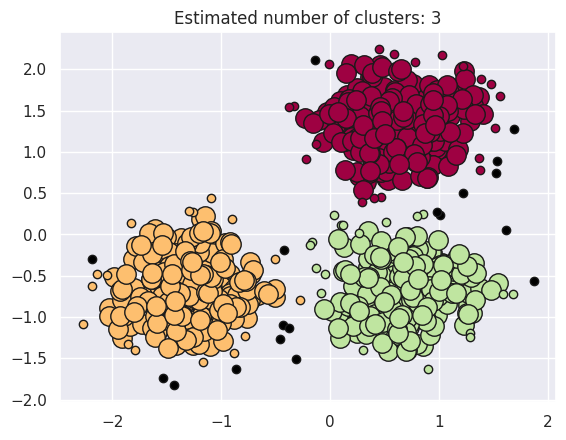

In [60]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

👉 Interpretasi visual:

* Titik besar berwarna → core samples dalam klaster.

* Titik kecil berwarna → non-core samples, tetap termasuk klaster.

* Titik hitam → noise/outlier.

# TUGAS PRAKTIKUM

1. Tugas K-Means

    Buatlah sebuah model K-Means dengan ketentuan,

    1. Gunakan data 'Mall_Customers.csv'

    2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

    3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

    jawab: dari hasil model menggunakan metode elbow clustering maka ditemukan bahwa jumlah K terbaik adalah 5.

In [4]:
# 1. Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. Import dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATASET/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


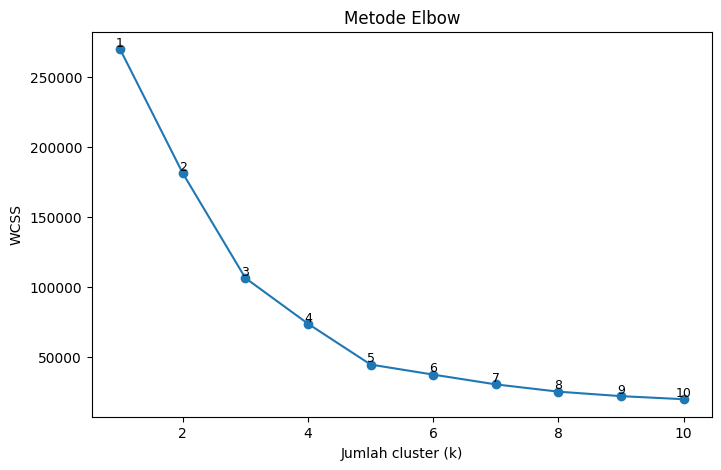

In [21]:
# 3. Tentukan jumlah klaster optimal menggunakan metode elbow dengan memilih variabel annual income dan spending score,
# karena keduanya saling berkaitan dan dapat menunjukkan sejauh mana pendapatan tahunan memengaruhi daya beli pengunjung
x = df[['Annual Income (k$)','Spending Score (1-100)']]

# 4. Tentukan clustering terbaik
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='-')
for i, val in enumerate(wcss):
    plt.text(i+1, val+2000, str(i+1), ha='center', fontsize=9)

plt.xlabel("Jumlah cluster (k)")
plt.ylabel("WCSS")
plt.title("Metode Elbow")
plt.show()

In [23]:
# 5. Lihat nilai sse setiap K
for idx, sse_val in enumerate(wcss, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28000000014
k=2; SSE=181363.59595959607
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948837
k=5; SSE=44448.45544793369
k=6; SSE=37265.86520484345
k=7; SSE=30259.657207285458
k=8; SSE=25050.832307547524
k=9; SSE=21862.09267218289
k=10; SSE=19657.783608703947


In [24]:
# 6. Buat model K-Means dengan jumlah kluster terbaik (ketika grafik turun mulai melambat = 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

# 7. Tambahkan hasil cluster ke dataset
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


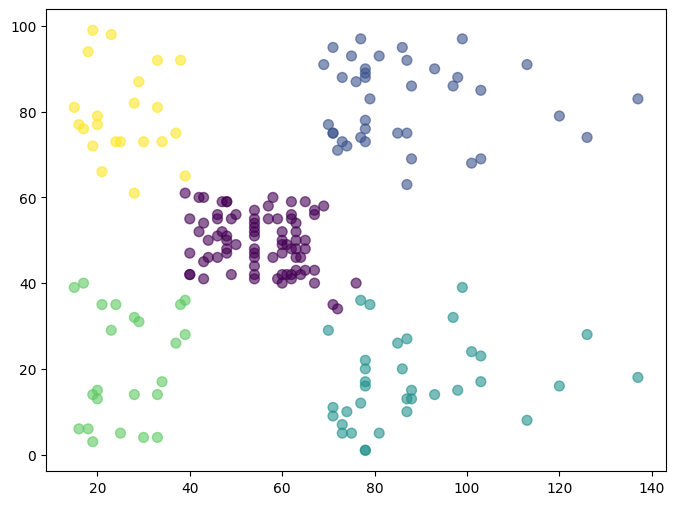

In [25]:
# 8. Visualisasi hasilnya
plt.figure(figsize=(8,6))
plt.scatter(x.iloc[:,0], x.iloc[:,1],
            c=y_kmeans, cmap="viridis", s=50, alpha=0.6)

In [26]:
# 9. Lihat hasil cluster
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        4  
2        3  
3        4  
4        3  


2. Tugas DBSCAN

    1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

    2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

    3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

    4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

    5. Lakukan eksperimen:

        * eps = 0.05, 0.1, 0.3, 0.5

        * min_samples = 3, 10, 20

        * Catat perubahan klaster, noise, dan kualitas evaluasi.

        jawab: setelah eksperimen dilakukan dengan eps:min_samples secara berurutan = 0.05:3, 0.1:10, 0.5:20 dapat disimpulkan bahwa hasilnya:

        a. eps = 0.05, min_samples = 3
        
        Terbentuk 67 cluster dengan 197 titik noise. Homogenitas cukup baik (0.80), namun completeness sangat rendah (0.15). Nilai V-measure (0.25), ARI (0.03), AMI (0.24), dan silhouette (0.07) menunjukkan kualitas klasterisasi yang buruk. Hal ini disebabkan oleh nilai eps yang terlalu kecil, sehingga data terpecah menjadi banyak cluster kecil dan pemisahan antar cluster menjadi tidak optimal.

        b. teps = 0.1, min_samples = 10

        Terbentuk 9 cluster dengan 63 titik noise. Homogenitas sangat tinggi (0.93), completeness meningkat meski masih rendah (0.35). V-measure (0.51), ARI (0.43), AMI (0.51), dan silhouette (0.18) menunjukkan kualitas yang lebih baik dibanding sebelumnya. Parameter ini menghasilkan klaster yang lebih stabil, dengan fragmentasi berkurang dan struktur mulai terlihat.

        c. eps = 0.5, min_samples = 20

        Terbentuk 2 cluster tanpa noise. Semua metrik evaluasi sangat tinggi: homogenitas, completeness, dan V-measure ≈ 0.99; ARI (0.996); AMI (0.98+); silhouette (0.39). Ini menunjukkan pemisahan cluster yang sangat baik. Nilai eps yang lebih besar dan min_samples yang tinggi memungkinkan DBSCAN menangkap struktur utama data dengan kualitas klasterisasi hampir sempurna.

In [32]:
# 1. Buat data set make_moons (1000 sampel, noise= 0.05)
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

X = StandardScaler().fit_transform(X)

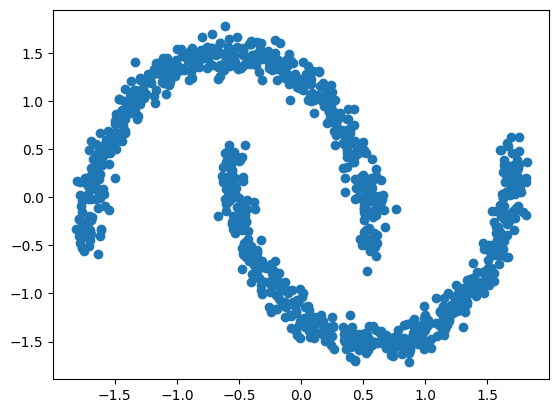

In [33]:
# 2. Visualisasikan data
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [36]:
# 3. Training dataset yang dibuat
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster: 2
Jumlah noise: 0


In [37]:
# 4. Lakukan evaluasi model
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(labels_true, labels))
print("Completeness:", metrics.completeness_score(labels_true, labels))
print("V-measure:", metrics.v_measure_score(labels_true, labels))
print("ARI:", metrics.adjusted_rand_score(labels_true, labels))
print("AMI:", metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette:", metrics.silhouette_score(X, labels))

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3915969903000845


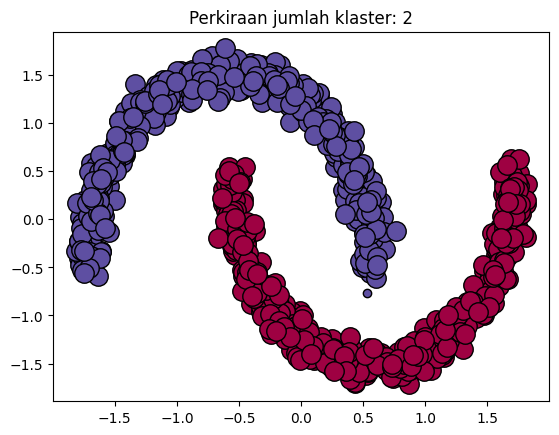

In [43]:
# 5. Visualisasi hasil kluster DBSCAN

# Ambil label unik (cluster yang terbentuk termasuk -1 untuk noise)
unique_labels = set(labels)

# Tandai core samples (titik pusat inti cluster menurut DBSCAN)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Tentukan warna untuk setiap cluster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Iterasi untuk setiap cluster (k)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise diberi warna hitam
        col = [0, 0, 0, 1]

    # Mask untuk semua titik dalam cluster k
    class_member_mask = labels == k

    # Titik core (inti cluster) → ukuran besar
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",                        # marker lingkaran
        markerfacecolor=tuple(col), # isi warna sesuai cluster
        markeredgecolor="k",        # garis pinggir hitam
        markersize=14               # titik besar
    )

    # Titik border (tepi cluster, bukan core) → ukuran kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6                # titik kecil
    )

plt.title(f"Perkiraan jumlah klaster: {n_clusters_}")
plt.show()

Jumlah cluster: 67
Jumlah noise: 197
Homogeneity: 0.8038246720088734
Completeness: 0.1549149103539664
V-measure: 0.25976694671908135
ARI: 0.03298442768684817
AMI: 0.24642806156858926
Silhouette: 0.07796687031009128


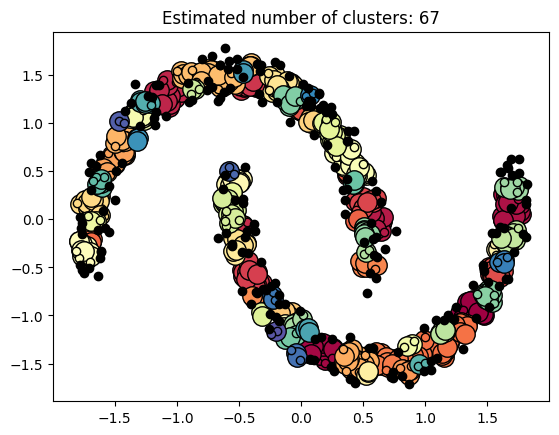

In [49]:
# 6. Eksperimen
# a. eps = 0.05 dan min samples = 3
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.05, min_samples=3).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

# evaluasi model
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(labels_true, labels))
print("Completeness:", metrics.completeness_score(labels_true, labels))
print("V-measure:", metrics.v_measure_score(labels_true, labels))
print("ARI:", metrics.adjusted_rand_score(labels_true, labels))
print("AMI:", metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette:", metrics.silhouette_score(X, labels))

# Visualisasi
# Ambil label unik (cluster yang terbentuk termasuk -1 untuk noise)
unique_labels = set(labels)

# Tandai core samples (titik pusat inti cluster menurut DBSCAN)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Tentukan warna untuk setiap cluster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Iterasi untuk setiap cluster (k)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise diberi warna hitam
        col = [0, 0, 0, 1]

    # Mask untuk semua titik dalam cluster k
    class_member_mask = labels == k

    # Titik core (inti cluster) → ukuran besar
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",                        # marker lingkaran
        markerfacecolor=tuple(col), # isi warna sesuai cluster
        markeredgecolor="k",        # garis pinggir hitam
        markersize=14               # titik besar
    )

    # Titik border (tepi cluster, bukan core) → ukuran kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6                # titik kecil
    )

plt.title(f"Estimated number of clusters: {n_clusters}")
plt.show()

Jumlah cluster: 9
Jumlah noise: 63
Homogeneity: 0.938949015074729
Completeness: 0.35828160098714606
V-measure: 0.5186559000396456
ARI: 0.43505179599480326
AMI: 0.5168994871020959
Silhouette: 0.18414033638490093


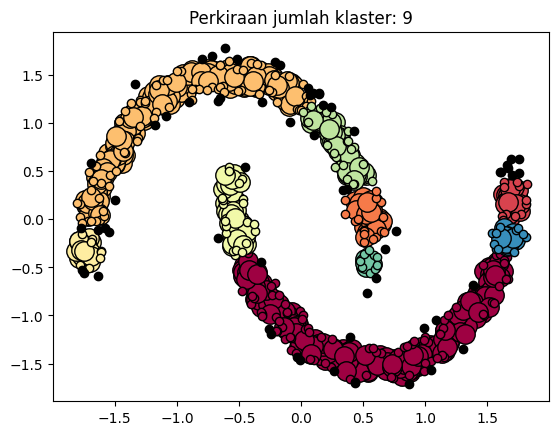

In [50]:
# b. eps = 0.1 dan min samples = 10
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=10).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

# evaluasi model
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(labels_true, labels))
print("Completeness:", metrics.completeness_score(labels_true, labels))
print("V-measure:", metrics.v_measure_score(labels_true, labels))
print("ARI:", metrics.adjusted_rand_score(labels_true, labels))
print("AMI:", metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette:", metrics.silhouette_score(X, labels))

# Visualisasi
# Ambil label unik (cluster yang terbentuk termasuk -1 untuk noise)
unique_labels = set(labels)

# Tandai core samples (titik pusat inti cluster menurut DBSCAN)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Tentukan warna untuk setiap cluster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Iterasi untuk setiap cluster (k)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise diberi warna hitam
        col = [0, 0, 0, 1]

    # Mask untuk semua titik dalam cluster k
    class_member_mask = labels == k

    # Titik core (inti cluster) → ukuran besar
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",                        # marker lingkaran
        markerfacecolor=tuple(col), # isi warna sesuai cluster
        markeredgecolor="k",        # garis pinggir hitam
        markersize=14               # titik besar
    )

    # Titik border (tepi cluster, bukan core) → ukuran kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6                # titik kecil
    )

plt.title(f"Perkiraan jumlah klaster: {n_clusters}")
plt.show()

Jumlah cluster: 2
Jumlah noise: 0
Homogeneity: 0.9895900789402428
Completeness: 0.9895929343037845
V-measure: 0.989591506619954
ARI: 0.995999996008016
AMI: 0.9895839817496578
Silhouette: 0.393222470955371


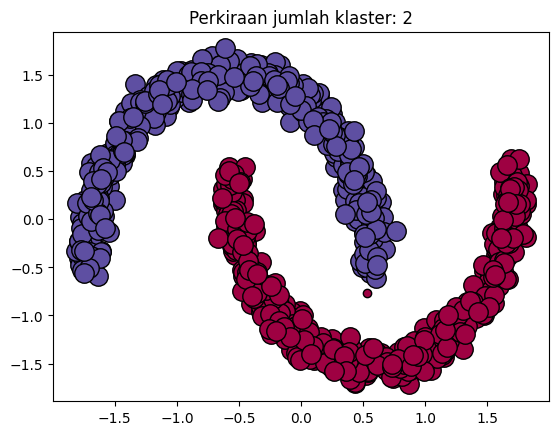

In [51]:
# b. eps = 0.5 dan min samples = 20
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=20).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

# evaluasi model
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(labels_true, labels))
print("Completeness:", metrics.completeness_score(labels_true, labels))
print("V-measure:", metrics.v_measure_score(labels_true, labels))
print("ARI:", metrics.adjusted_rand_score(labels_true, labels))
print("AMI:", metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette:", metrics.silhouette_score(X, labels))

# Visualisasi
# Ambil label unik (cluster yang terbentuk termasuk -1 untuk noise)
unique_labels = set(labels)

# Tandai core samples (titik pusat inti cluster menurut DBSCAN)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Tentukan warna untuk setiap cluster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Iterasi untuk setiap cluster (k)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise diberi warna hitam
        col = [0, 0, 0, 1]

    # Mask untuk semua titik dalam cluster k
    class_member_mask = labels == k

    # Titik core (inti cluster) → ukuran besar
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",                        # marker lingkaran
        markerfacecolor=tuple(col), # isi warna sesuai cluster
        markeredgecolor="k",        # garis pinggir hitam
        markersize=14               # titik besar
    )

    # Titik border (tepi cluster, bukan core) → ukuran kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6                # titik kecil
    )

plt.title(f"Perkiraan jumlah klaster: {n_clusters}")
plt.show()